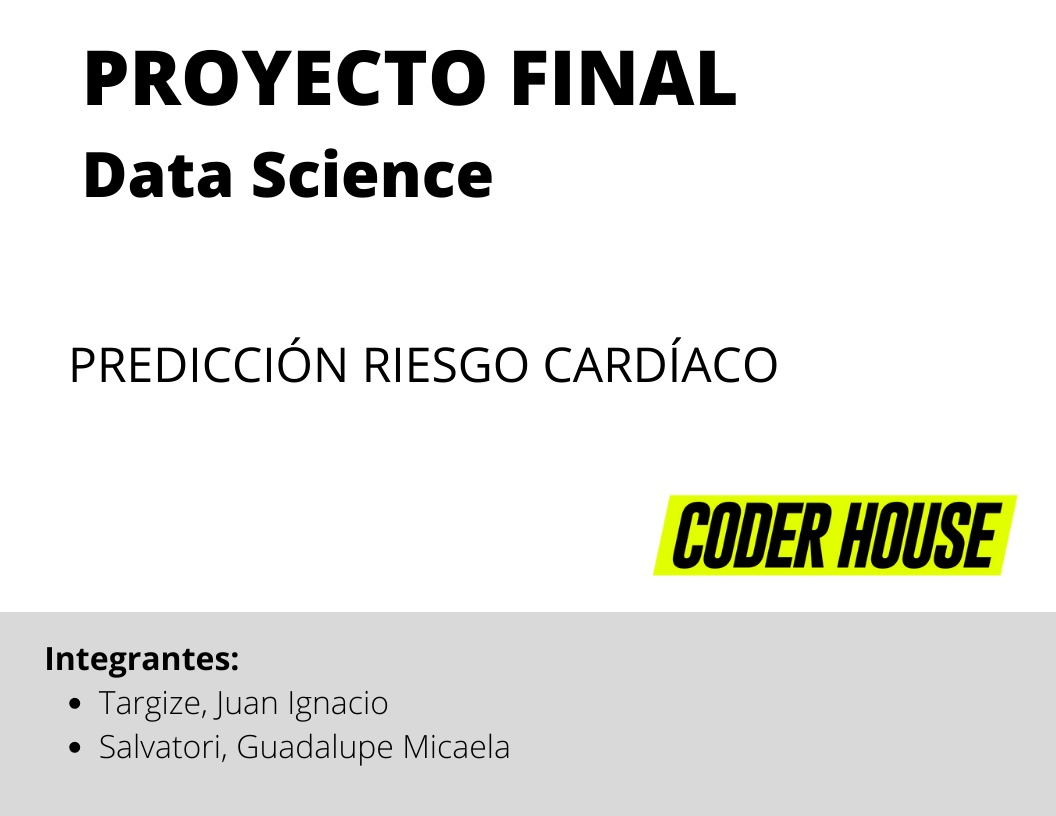

## Tabla de Contenidos:
   * [Empresa y Problema específico](#section_1_empresa)
   * [Preguntas y objetivos de la investigación](#section_1_preguntas)
   * [Conformación del equipo de trabajo](#section_1_equipo)
   * [Data Acquisition](#section_1_data_acquisition)
   * [Variable Description](#section_1_data_acquisition_variables)
   * [Data wrangling y EDA](#section_1_eda)  
       * [Análisis Variables Númericas](#section_1_eda_var_num)
       * [Análisis Variables Categóricas](#section_1_eda_var_cat)
       * [Correción de Datos y Outliers](#section_1_eda_outliers)
       * [Matriz de Correlación](#section_1_eda_matriz)
       * [Pair Plots](#section_1_eda_pair_plots)
   * [Preparación de datos](#section_2_preparacion_datos)
   * [Algoritmo de Clasificación](#section_2_algoritmos)
   * [Árboles de Decisión](#section_2_algoritmos_arboles).
   * [Random Forest](#section_2_algoritmos_random) 
   * [Regresión Logística](#section_2_algoritmos_reg_log) 
   * [Validación de datos](#section_3_valid_datos)
       * [Validación Simple](#section_3_valid_datos_simple)
       * [Cross validation: KFold](#section_3_valid_datos_Kfold)
       * [Cross Validation: Leave One Out](#section_3_valid_datos_leaveoneout)
       * [Comparación validaciones](#section_3_valid_datos_comparacion)
   * [Grid Search](#section_3_grid_search)
   * [Random Search](#section_3_random_search)


### 1. Empresa y Problema específico <a class="anchor" id="section_1_empresa"></a>

Somos una empresa encargada de ofrecer soluciones estratégicas operando en sectores como la salud, compañías farmaceúticas y el desarrollo biotecnologíco.

Nos encontramos implementando un nuevo sistema capaz de detectar y predecir la falla de riesgo cardíaco en pacientes.

En 2019, las enfermedades cardiovasculares acabaron con la vida de casi 18 millones de personas, lo que representa el 32 % de las muertes en todo el mundo (Fuente: Organización Mundial de la Salud, 2021). El 85% de estas muertes se debieron a ataques cardíacos y accidentes cerebrovasculares, con un 38% entre personas menores de 70 años.

La detección temprana es fundamental en el tratamiento y manejo de enfermedades cardiovasculares, donde el aprendizaje automático puede ser una herramienta poderosa para detectar un posible diagnóstico de enfermedad cardíaca.

### 2. Preguntas y objetivos de la investigación<a class="anchor" id="section_1_preguntas"></a>


El objetivo de la organización es desarrollar un programa de aprendizaje automático capaz de detectar enfermedades cardíacas en temprana edad para pacientes de alto riesgo, tales como diabetes, hiperlipidemia o alguna enfermedad ya establecida.

Nuestra pregunta y desafío principal es si con una poca cantidad de datos relativamente fácil de medir, se puede obtener un modelo de predicción adecuado para prevenir enfermedades cardíacas.

El objetivo principal de este trabajo es poder desarrollar el modelo de predicción mencionado. Para tal fin, en principio, se analizará y preparará la base de datos disponible, la cual será el input del modelo. Luego, se probarán distintos modelos de clasificación y se seleccionará el modelo que ajusta mejor para la problemática que se pretende resolver.


### 3. Conformación del equipo de trabajo<a class="anchor" id="section_1_equipo"></a>

El equipo se encuentra conformado por:

- Targize Juan Ignacio

- Salvatori Guadalupe Micaela

### 4. Data Acquisition<a class="anchor" id="section_1_data_acquisition"></a>

El dataset fue seleccionado de la página kaggle. El mismo cuenta con variables facilmente medibles en análisis de rutina que se pueden obetener en cualquier estudio cardíaco que se realice una persona en cualquier hospital de recursos moderados.

Fuente https://www.kaggle.com/fedesoriano/heart-failure-prediction


### 5. Variable Description<a class="anchor" id="section_1_data_acquisition_variables"></a>

A continuación, se describen brevemente las variables incluidas en el data set:

Age: Edad de los pacientes, en años.

Sex: Género de los pacientes, masculino o femenino.

ChestPainType: Típico dolor de pecho experimentado por el paciente:
    i. TA: Angina Típica
    ii. ATA: Angina Atípica
    iii. NAP: Dolor No-Anginal
    iv. ASY: Asintomático
        
RestingBP: Presión de sangre del paciente en reposo (mmHg).

Cholesterol: Colesterol del paciente (mg/dl).

FastingBS: Nivel de azucar en sangre del paciente.
    i. 1 si la glucosa es > 120 mg/dl
    ii. 0 otherwise

RestingECG: Resultado electrocardiograma en reposo:
    i. Normal
    ii. ST: Posee una onda ST-T Anormal (Inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV)
    iii. LVH: Muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes

MaxHR: Frecuencia cardíaca máxima alcanzada, latidos por minuto.

ExerciseAngina: Angina inducida por el ejercicio, sí o no.

Oldpeak: Medida numérica de la depresión del ST inducida por el ejercicio en relación con el reposo.

ST_Slope: La pendiente del segmento ST de ejercicio máximo.
    i. Up: pendiente ascendente
    ii. Plana
    iii. Down: pendiente descendente


### 5. Data wrangling y EDA<a class="anchor" id="section_1_eda"></a>

En esta sección se preparará la base de datos disponible y se analizarán las características de la misma, de forma tal de asegurar que el input del modelo sea correcto y adecuado.

In [46]:
# Importamos librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Imports Sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Imports Numpy

from numpy import absolute
from numpy import std
from numpy import mean

In [23]:
#Importación dataset
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [15]:
# Analizamos el dataset seleccionado
df.shape

(918, 12)

In [16]:
#Verificamos que no haya datos nulos y que sea congruente el tipo de dato por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
# Analizamos las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
# Analizamos las variables categóricas
df.select_dtypes(include=['object']).describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [18]:
# Separamos las variables numéricas y las categóricas
num = df.select_dtypes(include=np.number)
num

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [19]:
cat = df.select_dtypes(exclude=np.number)
cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


### 5.1 Análisis Variables Númericas  <a class="anchor" id="section_1_eda_var_num"></a>

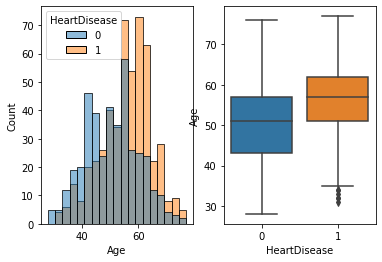

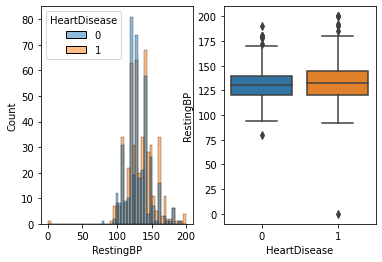

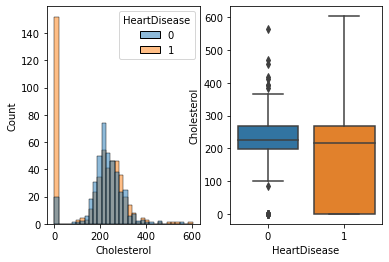

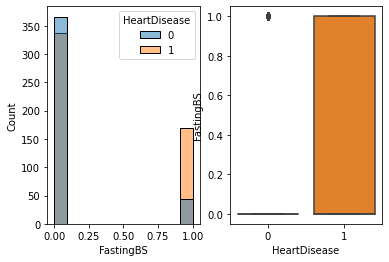

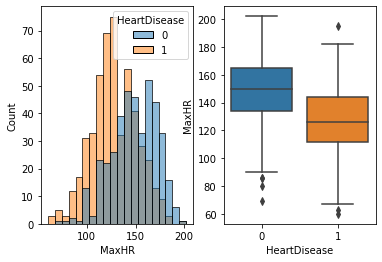

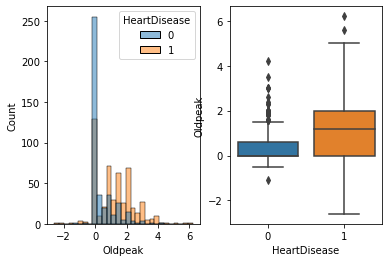

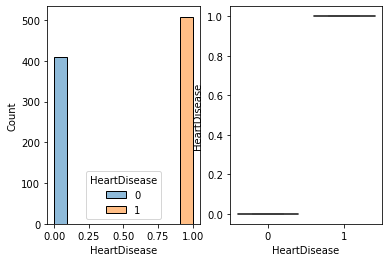

In [10]:
# Realizamos un análisis exploratorio de las variables númericas
for i in num:
    fig, axs = plt.subplots(ncols=2)
    sns.histplot(x=num[i], hue=df.HeartDisease, data=df,ax=axs[0])
    sns.boxplot(y= num[i], x= df.HeartDisease, data=df,ax=axs[1]) 


Las primeras observaciones que podemos realizar es que todas las variables poseen distribuciones choerentes, salvo el colesterol el cual presenta una cantidad anormal de casos en cero. Esto se corregira remplazandolo por la media a fín de tener menos error. En el cálculo de la frecuencia, el cual se muestra a continuación, también se puede notar esta observación.

Como primera observación podemos observar un marcado aumento del fallo de riesgo cardíaco con la edad donde la mayoría de estos pacientes se encuentran entre los 52 y 62 años aproximadamente. Así también podemos decir que los pacientes entre los 40 y 52 años presentaron menos fallos cardíacos.

Analizando la presión arterial, podemos ver que los diagramas de caja son proporcionales entre los grupos. La presión arterial mediana es de aproximadamente 130 mmHg en ambos grupos.

En pacientes con diabetes, casi el 80% tienen enfermedades del corazón.

Podemos observar que los pacientes sin enfermedad cardíaca pueden alcanzar frecuencias cardíacas máximas más altas que los pacientes con enfermedad cardíaca, con una frecuencia cardíaca mediana de 150 latidos por minuto frente a una mediana de 125 latidos por minuto en pacientes cardiovasculares.

Como último, existe una diferencia notable en los gráficos de caja de la depresión del segmento ST entre los grupos. Donde hay mas variabilidad con valores atípicos más grandes cuando hay enfermedad (aproximadamente entre 0 y 2 mm) que cuando no hay (de 0 a 0,5 mm).

### 5.2 Análisis Variables Categóricas  <a class="anchor" id="section_1_eda_var_cat"></a>

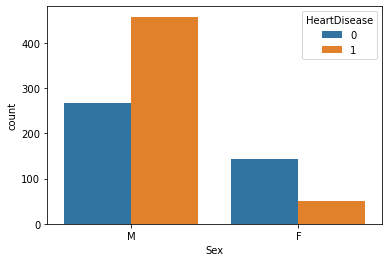

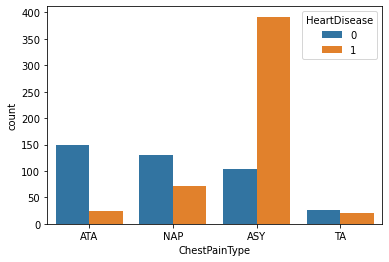

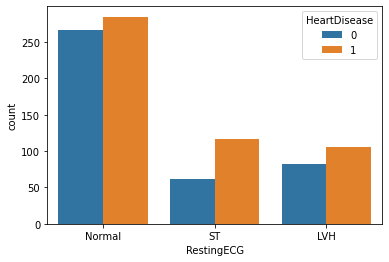

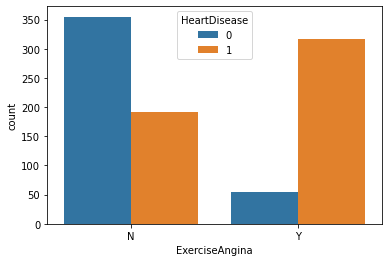

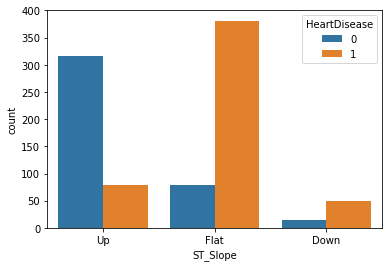

In [11]:
# Realizamos un análisis de las variables categóricas 
for i in cat:
    fig, axs = plt.subplots(ncols=1)
    sns.countplot(data= df, x=cat[i],hue=df.HeartDisease)


Podemos observar que los hombres presentan un mayor riesgo de tener enfermedades cardíacas.

La prevalencia de enfermedades cardíacas es aún mayor en pacientes con angina de esfuerzo, con más del 85 %.

Según los resultados de la prueba de ECG en reposo, más del 65 % de los pacientes a los que se les diagnosticó una enfermedad cardíaca tenían anomalías en la onda ST-T en su ECG, la proporción más alta entre los grupos.

Los pacientes con una pendiente ST plana o descendente durante el ejercicio tienen la mayor prevalencia de enfermedad cardiovascular con un 82,8 % y un 77,8 %, respectivamente.

### 5.3 Correción de Datos y Outliers <a class="anchor" id="section_1_eda_outliers"></a>

La existencia de ceros en las variables colesterol y presión sanguínea en reposo (Resting BP) indícan que es un error al tomar la información. Estos datos serán remplazados por su media a fin de obtener un resultado más representativo.

In [4]:
#Remplazo los valores por la media
df['Cholesterol'] = df['Cholesterol'].replace(0,df['Cholesterol'].mean())
display(pd.DataFrame(df.groupby('HeartDisease')['Cholesterol'].describe()))

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,236.819491,54.706689,85.0,198.799564,227.0,266.75,564.0
1,508.0,235.424279,57.495497,100.0,198.799564,217.0,267.00,603.0


In [5]:
df['RestingBP'] = df['RestingBP'].replace(0,df['RestingBP'].mean())
display(pd.DataFrame(df.groupby('HeartDisease')['RestingBP'].describe()))

,count,mean,std,min,25%,50%,75%,max
HeartDisease,,,,,,,,
0,410.0,130.180488,16.499585,80.0,120.0,130.0,140.0,190.0
1,508.0,134.445662,18.910339,92.0,120.0,132.0,145.0,200.0


### 6. Matriz de Correlación <a class="anchor" id="section_1_eda_matriz"></a>

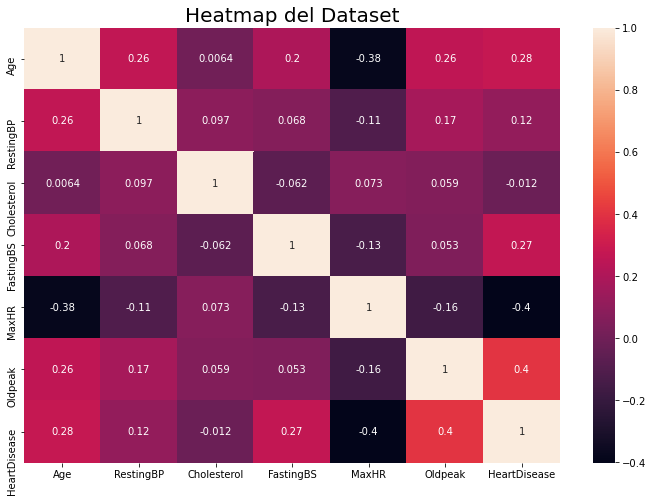

In [14]:
# Realizaremos un mapa de calor entre las variables del dataset utilizando la correlación de pearson
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr('pearson'),annot = True)
plt.title('Heatmap del Dataset', fontsize = 20)
plt.show()

Utilizando la correlación de Pearson que indica la correlación lineal entre dos variables cuantitativas, podemos realizar analísis sobre que variables influyen mas entre sí y cuales no.
En el mapa se observa que la correlación más alta de variables se presenta entre la frecuencia cardíaca (MaxHR) y el riesgo cardíaco, siendo la misma una correlación negativa.

### 7. Análisis bivariado de datos: Pair Plots <a class="anchor" id="section_1_eda_pair_plots"></a>


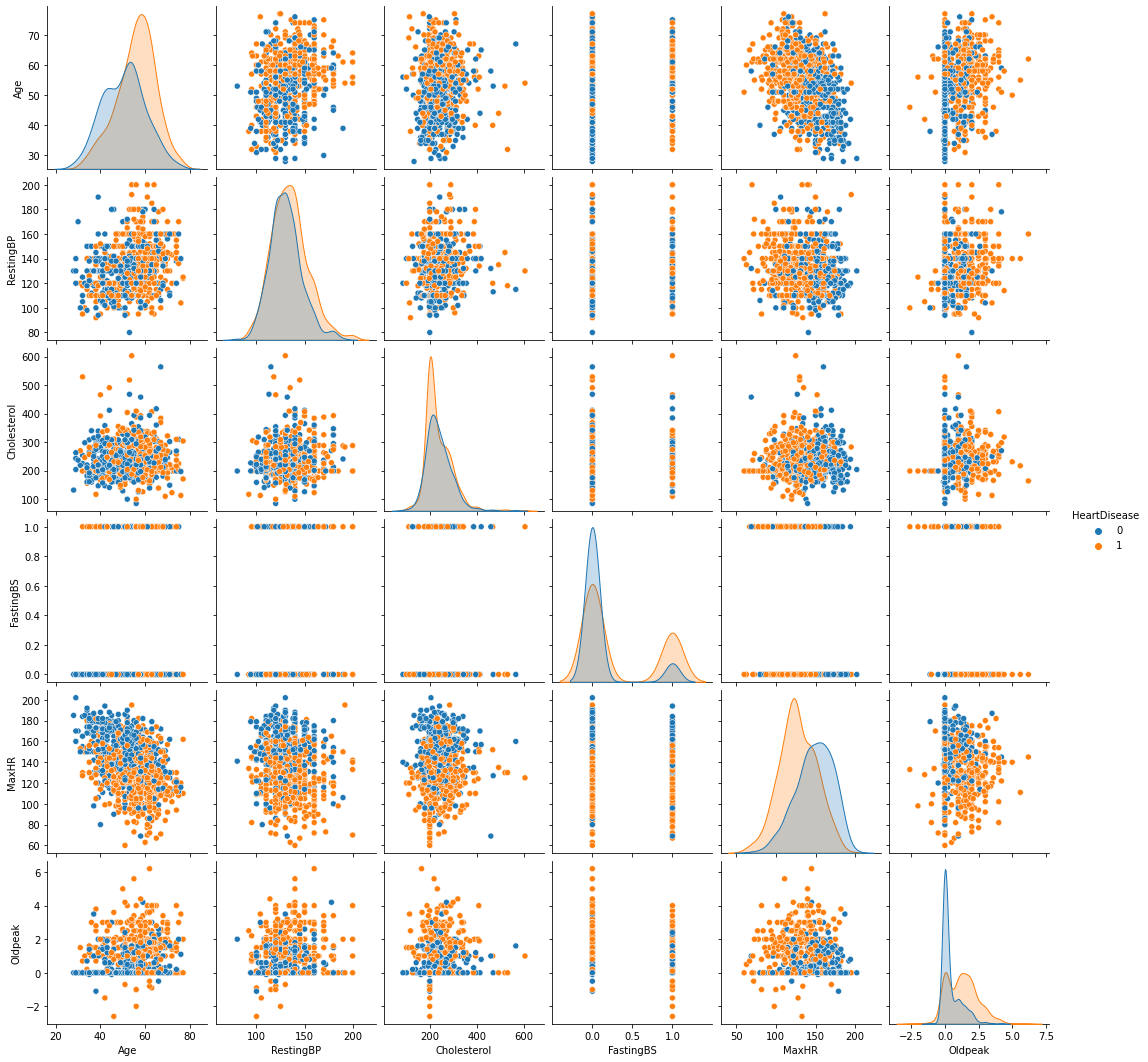

In [15]:
sns.pairplot(df,hue="HeartDisease")

En este caso se analizó la relación entre las distintas variables del data set y el riesgo cardíaco. En el gráfico se puede observar la misma tendencia analizada previamente.

En general, se observa un aumento del fallo cardíaco con la edad. Si se analiza, a su vez, la relación de la edad con las demás variables, se observa:
- La frecuencia máxima alcanzada (MaxHR) disminuye a mayor edad, y que a mayor posibilidad de fallo cardíaco, menor es la máxima frecuencia cardíaca alcanzada.
- En general, la presión en sangre del paciente aumenta a mayor edad y también presenta mayores posibilidades de fallo cardíaco.
- A mayor edad, mayor es el nivel de colesterol en sangre, y, asimismo, mayores niveles de colesterol presentan mayores fallas al riesgo cardíaco.
- A mayor edad, mayor nivel de glucosa en sangre, y, a su vez, mayor nivel de glucosa predispone a mayor falla de riesgo cardíaco.
- Aumento de la depresión del ST a medida que aumenta la edad, y, también, una mayor depresión del ST implica una mayor falla al riesgo cardíaco.


In [25]:
# Se convierten las variables categóricas como únicas numéricas, así se pueden utilizar para el algoritmo
cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
lb=LabelEncoder()
df[cat] = df[cat].apply(lb.fit_transform)

### 8. Preparación de datos preliminar <a class="anchor" id="section_2_preparacion_datos"></a>


En principio, se realizará un método de validación simple de datos y luego, en una sección posterior, se utilizarán distintas técnicas para la preparación de los datos de entrenamiento y test. De esta manera, se podrá evaluar el impacto de cada método en el algoritmo seleccionado.

In [26]:
#En principio, se define la variable objetivo (Y), que en este caso corresponde a HeartDisease.
y = df.HeartDisease
X = df.drop(columns = 'HeartDisease')

In [27]:
#Preparación train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y) 

### 9. Algoritmo de Clasificación <a class="anchor" id="section_2_algoritmos"></a>

Decidimos probar 3 algoritmos de clasificación de aprendizaje supervisado y observar las métricas que generan, para luego definir cual eligiremos. Se probarán los siguientes algoritmos: árboles de decisión, random forest y regresión logística. 

### 9.1 Árboles de Decisión <a class="anchor" id="section_2_algoritmos_arboles"></a>


Primero vamos a buscar cual es el max depth y min samples split que genera el menor error en testing, lo cual nos interesa para no overfittear

In [21]:
tree = DecisionTreeClassifier(max_depth=5,min_samples_split=30) 

In [22]:
#Entrenamiento del modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=30)

In [23]:
#Predicción del modelo
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test) 

In [24]:
#Cálculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Porcentaje de aciertos sobre el set de evaluación:',round(test_accuracy*100,2),'%')

Porcentaje de aciertos sobre el set de evaluación: 80.43 %


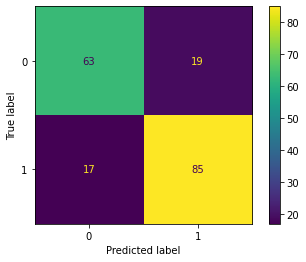

In [25]:
#Ploteamos la Matriz
cm_tree = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()

plt.show()

En la matriz de confusión se puede observar una gran cantidad de valores verdaderos positivos, lo que significa que el modelo predice correctamente el valor. Sin embargo, se observa una gran cantidad de valores falsos negativos (error tipo 2), los cuales no son deseables ya que el modelo predice incorrectamente la clase positiva, cuando la misma es negativa.

In [26]:
# Calculo de la precisión, ROC, AUC y F1
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

print('La precision del set de entrenamiento:', round(train_precision*100,2),'%')
print('La precision del set de evaluación:',round(test_precision*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc*100,2),'%')



La precision del set de entrenamiento: 87.04 %
La precision del set de evaluación: 81.73 %
El ROC y AUC de entrenamiento es de : 87.77 %
El ROC y AUC de evaluación es de: 80.08 %


In [27]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        82
           1       0.82      0.83      0.83       102

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



Text(0.5, 1.0, 'Curva ROC')

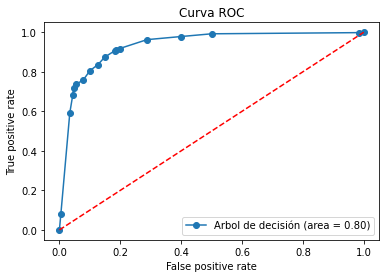

In [28]:
#Graficamos Curva ROC
y_score = tree.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_score)
plt.plot(fpr, tpr, '-o',label='Arbol de decisión (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.title('Curva ROC')

Observamos una que la curva ROC nos muestra un comportamiento mas que aceptable para la predicción realizada

**Feature Importance**

In [29]:
#Importancia de cada feature para el árbol
tree_importance = pd.DataFrame({"Feature Importance":tree.feature_importances_}, 
                               index=X_train.columns)
tree_importance

,Feature Importance
Age,0.017395
Sex,0.025792
ChestPainType,0.131937
RestingBP,0.002607
Cholesterol,0.009036
FastingBS,0.006394
RestingECG,0.003947
MaxHR,0.075914
ExerciseAngina,0.000000
Oldpeak,0.093594


### 9.2 Random Forest <a class="anchor" id="section_2_algoritmos_random"></a>


In [28]:
#Creación del modelo Random Forest.
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
#Predicción del modelo
y_train_pred_rf = model_rf.predict(X_train) 
y_test_pred_rf = model_rf.predict(X_test) 

In [31]:
#Cálculo el accuracy en Train y Test

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print('Porcentaje de aciertos sobre el set de entrenamiento:',round(train_accuracy_rf*100,2),'%')
print('Porcentaje de aciertos sobre el set de evaluación:',round(test_accuracy_rf*100,2),'%')


Porcentaje de aciertos sobre el set de entrenamiento: 100.0 %
Porcentaje de aciertos sobre el set de evaluación: 88.04 %


**Feature Importance**

Text(0.5, 0, 'Feature Importance')

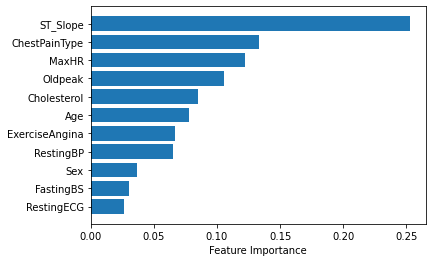

In [34]:
sort = model_rf.feature_importances_.argsort()
plt.barh(X_train.columns[sort], model_rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

En este caso la importancia de las variables es más equitativa que la calculada con el modelo de árboles de decisión. Y todas las variables presentan importancia.

In [61]:
# Cálculo de la precisión, ROC, AUC y F1

train_precision_rf = precision_score(y_train, y_train_pred_rf)
test_precision_rf= precision_score(y_test, y_test_pred_rf)
train_auc_rf = roc_auc_score(y_train, y_train_pred_rf)
test_auc_rf = roc_auc_score(y_test, y_test_pred_rf)

print('La precision del set de entrenamiento:', round(train_precision*100,2),'%')
print('La precision del set de evaluación:',round(test_precision*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc*100,2),'%')

La precision del set de entrenamiento: 87.04 %
La precision del set de evaluación: 81.73 %
El ROC y AUC de entrenamiento es de : 87.77 %
El ROC y AUC de evaluación es de: 80.08 %


In [62]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        82
           1       0.88      0.89      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



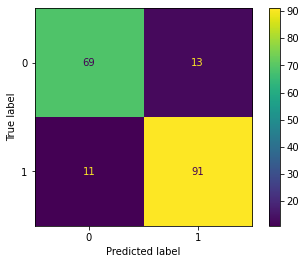

In [63]:
#Ploteamos la Matriz
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()

plt.show()

La matriz de confusión obtenida para el modelo Random Forest arroja resultados similares a la matriz de árboles
de decisión. Sin embargo, se observa una leve disminución en los valores falsos negativos y falsos positivos.

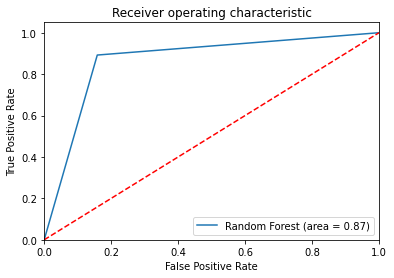

In [64]:
#Graficamos Curva ROC

rf_roc_auc = roc_auc_score(y_test, y_test_pred_rf)
y_score_rf = tree.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Rf_ROC')
plt.show()

### 9.3 Regresión Logística <a class="anchor" id="section_2_algoritmos_reg_log"></a>


In [65]:
#Creación regresión logística
regresion_logistica = LogisticRegression(max_iter=700,random_state=42)

In [66]:
#Entrenamiento del modelo
model_rl = regresion_logistica.fit(X_train,y_train)
print("Accuracy de entrenamiento:", round(model_rl.score(X_train, y_train)*100,2), '%')

Accuracy de entrenamiento: 84.74 %


In [67]:
#Evaluación del modelo

p_pred = model_rl.predict_proba(X_test)[:,1]
y_test_pred_rl = model_rl.predict(X_test)


In [68]:
#Calculo el accuracy en Test
test_accuracy_rl = accuracy_score(y_test, y_test_pred_rl)

print('Porcentaje de aciertos sobre el set de evaluación:',round(test_accuracy_rl*100,2),'%')

Porcentaje de aciertos sobre el set de evaluación: 85.33 %


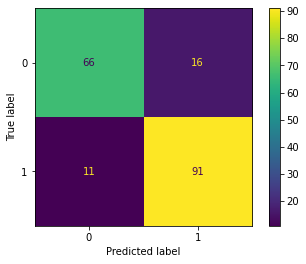

In [69]:
cm_rl = confusion_matrix(y_test, y_test_pred_rl)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rl)
disp.plot()

plt.show()

In [70]:
# Cálculo de la precisión, ROC, AUC y F1

test_precision_rl = precision_score(y_test, y_test_pred_rl)

test_auc_rl = roc_auc_score(y_test, y_test_pred_rl)


print('La precision del set de evaluación:',round(test_precision_rl*100,2),'%')

print('El ROC y AUC de evaluación es de:',round(test_auc_rl*100,2),'%')

La precision del set de evaluación: 85.05 %
El ROC y AUC de evaluación es de: 84.85 %


In [71]:
print(classification_report(y_test, y_test_pred_rl))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        82
           1       0.85      0.89      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



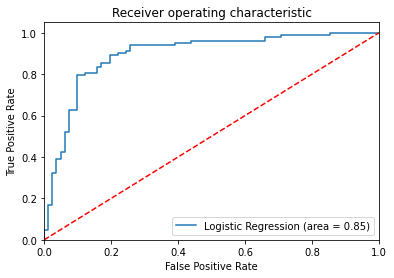

In [72]:
#Graficamos Curva ROC

logit_roc_auc = roc_auc_score(y_test, y_test_pred_rl)
fpr, tpr, thresholds = roc_curve(y_test, p_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Conclusión preliminar modelos**

Observando las métricas utilizadas, podemos concluir que el modelo que mejor se comporto fue el de random forest, obteniendo los mayores porcentajes de exactitud, precisión y AUC.
Por lo tanto, a partir de esta instancia, se utilizará y evaluará el impacto de distintas técnicas de validación de datos para luego, a su vez, mejorar y optimizar el modelo random forest.

### **10. Validación de datos**<a class="anchor" id="section_3_valid_datos"></a>

En esta sección se probarán distintos métodos de validación de datos: validación simple, KFold y LOO. Dichos métodos son realizandos a continuación.

**Validación simple de datos**<a class="anchor" id="section_3_valid_datos_simple"></a>

In [36]:
model_rf.fit(X_train, y_train)
score_sv = model_rf.score(X_test, y_test)

**Cross validation: KFold**<a class="anchor" id="section_3_valid_datos_Kfold"></a>

In [47]:
y = df['HeartDisease'].to_numpy() 

for n in df.columns:
    if str(df[n].dtype) == 'object' or str(df[n].dtype) == 'category':
        df[n] = df[n].astype('category').cat.codes
X = df.drop(['HeartDisease'], axis=1).to_numpy()

KFold = KFold(n_splits=5, random_state=0, shuffle=True)

scores_kf = cross_val_score(model_rf, X, y, scoring='accuracy', cv=KFold, n_jobs=-1)

**Cross Validation: Leave One Out**<a class="anchor" id="section_3_valid_datos_leaveoneout"></a>

In [38]:
loo = LeaveOneOut()

scores_loo = cross_val_score(model_rf, X, y, scoring='accuracy', cv=loo, n_jobs=-1)

**Comparación validaciones**<a class="anchor" id="section_3_valid_datos_comparacion"></a>

In [104]:
print('Accuracy Simple Validation: %.3f (%.3f)' % (mean(score_sv), std(score_sv)))
print('Accuracy KFold: %.3f (%.3f)' % (mean(scores_kf), std(scores_kf)))
print('Accuracy Loo: %.3f (%.3f)' % (mean(scores_loo), std(scores_loo)))

Accuracy Simple Validation: 0.864 (0.000)
Accuracy KFold: 0.865 (0.018)
Accuracy Loo: 0.861 (0.346)


A priori, podría decirse que el accuracy del modelo de validación simple es el más alto. Sin embargo, se utilizarán los conjuntos de train y test obtenidos por el modelo LOO, con el objeto de obtener mejores resultados en la predicción del modelo en función de datos de entrada obtenidos a partir de una técnica de validación cruzada.

### 11. Optimización del modelo

Como fue mencionado previamente, el modelo que obtuvo un mejor comportamiento fue el random forest. Por lo tanto, en esta sección se realizarán distintos métodos para optimizar el mismo: gridsearch y randomsearch.

### 11.1 GridSearch <a class="anchor" id="section_3_grid_search"></a>

In [32]:
# Cantidad de árboles en el random forest
n_estimators = [200,400,600]
# Cantidad de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Máxima cantidad de niveles en cada arbol
max_depth = [5,10]
max_depth.append(None)
# Cantidad mínima de muestras para seprar un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [33]:
rf_GS = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 3)
rf_GS.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [34]:
rf_GS.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [87]:
model_rf1 = RandomForestClassifier(random_state=42,bootstrap = False, max_depth = 10,
                                   max_features ='sqrt', min_samples_leaf = 4, min_samples_split = 2,
                                   n_estimators = 400, class_weight="balanced")
model_rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=4,
                       n_estimators=400, random_state=42)

In [91]:
y_train_pred_rf1 = model_rf1.predict(X_train)
y_test_pred_rf1 = model_rf1.predict(X_test)

In [92]:
train_precision_rf1 = precision_score(y_train, y_train_pred_rf1)
test_precision_rf1 = precision_score(y_test, y_test_pred_rf1)
train_auc_rf1 = roc_auc_score(y_train, y_train_pred_rf1)
test_auc_rf1 = roc_auc_score(y_test, y_test_pred_rf1)

print('La precision del set de entrenamiento:', round(train_precision_rf1*100,2),'%')
print('La precision del set de evaluación:',round(test_precision_rf1*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc_rf1*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc_rf1*100,2),'%')

La precision del set de entrenamiento: 96.58 %
La precision del set de evaluación: 89.9 %
El ROC y AUC de entrenamiento es de : 96.51 %
El ROC y AUC de evaluación es de: 87.53 %


**Tiempo de GridSearch**

In [41]:
%%time
#Se repite el código previo para calcular cuánto tiempo tarda en correr.

# Cantidad de árboles en el random forest
n_estimators = [200,400,600]
# Cantidad de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Máxima cantidad de niveles en cada arbol
max_depth = [5,10]
max_depth.append(None)
# Cantidad mínima de muestras para seprar un nodo
min_samples_split = [2, 5, 10]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 4]
# Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_GS = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv= 3)
rf_GS.fit(X_train, y_train)

rf_GS.best_params_

model_rf1 = RandomForestClassifier(random_state=42,bootstrap = False, max_depth = 10,
                                   max_features ='sqrt', min_samples_leaf = 4, min_samples_split = 2,
                                   n_estimators = 400, class_weight="balanced")
model_rf1.fit(X_train, y_train)


y_train_pred_rf1 = model_rf1.predict(X_train)
y_test_pred_rf1 = model_rf1.predict(X_test)

train_precision_rf1 = precision_score(y_train, y_train_pred_rf1)
test_precision_rf1 = precision_score(y_test, y_test_pred_rf1)
train_auc_rf1 = roc_auc_score(y_train, y_train_pred_rf1)
test_auc_rf1 = roc_auc_score(y_test, y_test_pred_rf1)


CPU times: user 5min 2s, sys: 2.49 s, total: 5min 4s
Wall time: 5min 5s


### 11.2 RandomSearch <a class="anchor" id="section_3_random_search"></a>

In [93]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [94]:
rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [95]:
rf_random.best_params_


{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [98]:
model_rf2= RandomForestClassifier(n_estimators=1400,class_weight="balanced", max_features="auto", 
                                  max_depth= 70,min_samples_split = 2,min_samples_leaf = 2,bootstrap= True,)
model_rf2.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=70,
                       min_samples_leaf=2, n_estimators=1400)

In [99]:
y_train_pred_rf2 = model_rf2.predict(X_train)
y_test_pred_rf2 = model_rf2.predict(X_test)


In [100]:
train_precision_rf2 = precision_score(y_train, y_train_pred_rf2)
test_precision_rf2 = precision_score(y_test, y_test_pred_rf2)
train_auc_rf2 = roc_auc_score(y_train, y_train_pred_rf2)
test_auc_rf2 = roc_auc_score(y_test, y_test_pred_rf2)

print('La precision del set de entrenamiento:', round(train_precision_rf2*100,2),'%')
print('La precision del set de evaluación:',round(test_precision_rf2*100,2),'%')
print('El ROC y AUC de entrenamiento es de :', round(train_auc_rf2*100,2),'%')
print('El ROC y AUC de evaluación es de:',round(test_auc_rf2*100,2),'%')

La precision del set de entrenamiento: 96.6 %
La precision del set de evaluación: 89.32 %
El ROC y AUC de entrenamiento es de : 96.88 %
El ROC y AUC de evaluación es de: 88.39 %


**Tiempo de RandomSearch**

In [42]:
%%time
#Se repite el código previo para calcular cuánto tiempo tarda en correr.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)
rf_random.fit(X_train, y_train)

rf_random.best_params_

model_rf2= RandomForestClassifier(n_estimators=1400,class_weight="balanced", max_features="auto", 
                                  max_depth= 70,min_samples_split = 2,min_samples_leaf = 2,bootstrap= True,)
model_rf2.fit(X_train,y_train)

y_train_pred_rf2 = model_rf2.predict(X_train)
y_test_pred_rf2 = model_rf2.predict(X_test)

train_precision_rf2 = precision_score(y_train, y_train_pred_rf2)
test_precision_rf2 = precision_score(y_test, y_test_pred_rf2)
train_auc_rf2 = roc_auc_score(y_train, y_train_pred_rf2)
test_auc_rf2 = roc_auc_score(y_test, y_test_pred_rf2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
CPU times: user 3.62 s, sys: 166 ms, total: 3.79 s
Wall time: 1min 6s


### Conclusiones Finales<a class="anchor" id="section_3_random_search"></a>

Como pudimos apreciar al realizar la validación cruzada de datos y utilizar estos valores obtenidos para grid y random search se obtuvo una disminución en la precisión del set de entrenamiento (respecto el original) del 100% al 96.6% lo que indica que se corrigió el overfitting del modelo simple de random forest.

Tanto con el grid search propuesto como con el random search se obtuvieron precisiones similares y más que aceptables para el problema propuesto y mejorando el modelo random forest original. Sin embargo, se observa que la optimización del modelo con el método RandomSearch requiere mucho menor tiempo de ejecución que el modelo GridSearch.

En base a los resultados obtenidos se puede concluir que el modelo desarrollado a partir del método random forest cumple el objetivo principal de este proyecto.

Nos quedaría a futuro exprimir que parámetros son mejores para optimizar de la gran cantidad que se poseen en el modelo random forest, y probar con una mayor cantidad de modelos.